In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline

import statsmodels.api as sm
import statsmodels.tsa.api as smt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data Preparation and Understanding. 

In [3]:
data = pd.read_csv('day.csv')

In [4]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
data.info() #No null entries in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
#cnt is the target variable 
#instant, dteday - not required for analysis as the day specifics are mentioned in the weekday or workingday columns
#casual & registered sums to cnt, hence we don't consider as a dependent variable

data.drop(["instant","dteday","casual","registered"], axis = 1, inplace=True)

# EDA

In [8]:
data["season"] = data["season"].map({1: "spring", 2: "summer", 3:"fall",4:"winter"})

In [9]:
data["mnth"] = data["mnth"].map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul",
                                 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})

In [10]:
data["weekday"] = data["weekday"].map({6:"Mon",0:"Tue",1:"Wed",2:"Thu",3:"Fri",4:"Sat",5:"Sun"}) 
#assumptions taken in entire cohort as tue to be 0

In [11]:
data["weathersit"] = data["weathersit"].map({1:"Clear",2:"Mist",3:"Light_snow",4:"Heavy_Rain"})

<Axes: xlabel='cnt', ylabel='Density'>

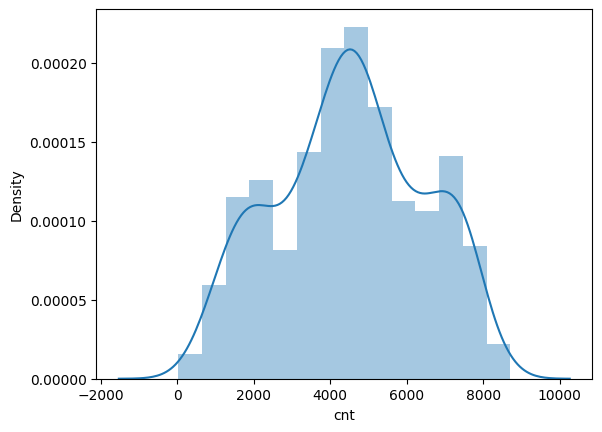

In [12]:
sns.distplot(data["cnt"])

<Axes: xlabel='yr', ylabel='cnt'>

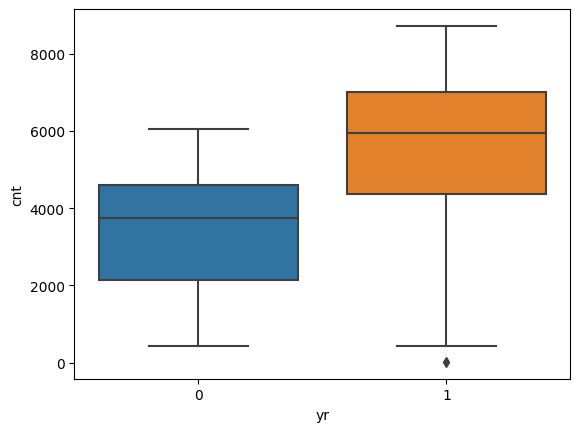

In [13]:
sns.boxplot(y=data["cnt"], x=data["yr"])
#In 2018, boom bikes were not popular, hence demand increased based on popularity

<Axes: xlabel='mnth', ylabel='cnt'>

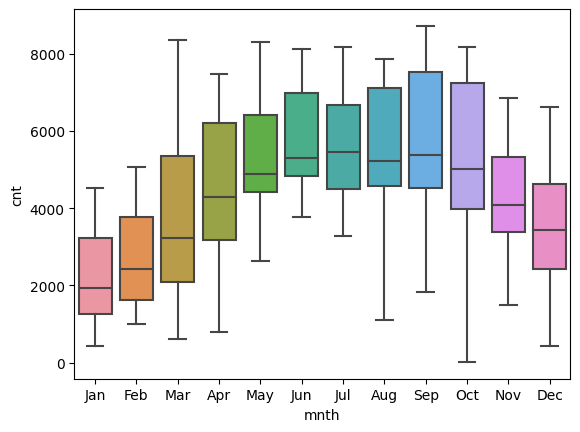

In [14]:
sns.boxplot(y=data["cnt"], x=data["mnth"])
#Demand is more likely high in the months of may to october

<Axes: xlabel='season', ylabel='cnt'>

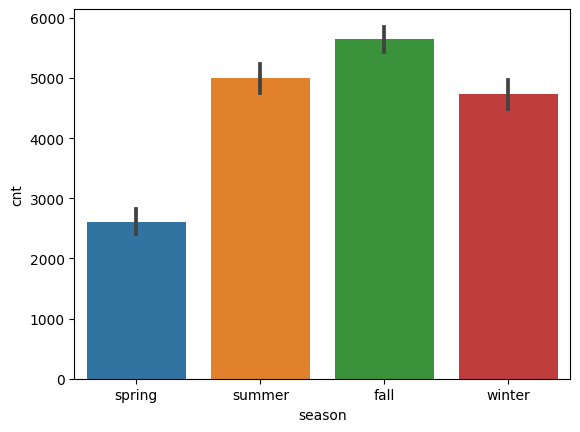

In [15]:
sns.barplot(x=data["season"], y=data["cnt"]) 
#Demand is high in fall

<Axes: xlabel='weekday', ylabel='cnt'>

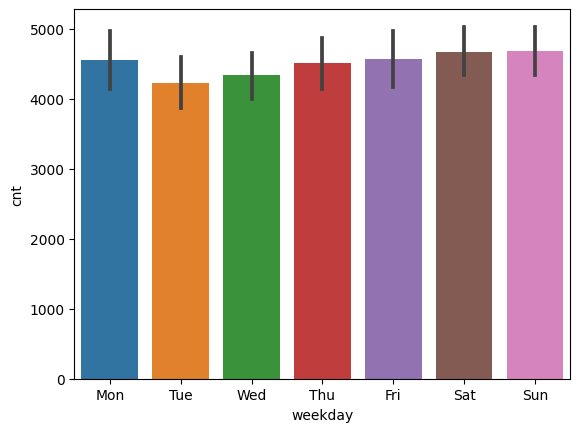

In [16]:
sns.barplot(x=data["weekday"], y=data["cnt"]) 
#Demand is high on Thursday, Friday, Saturday & Sunday

<Axes: xlabel='workingday', ylabel='cnt'>

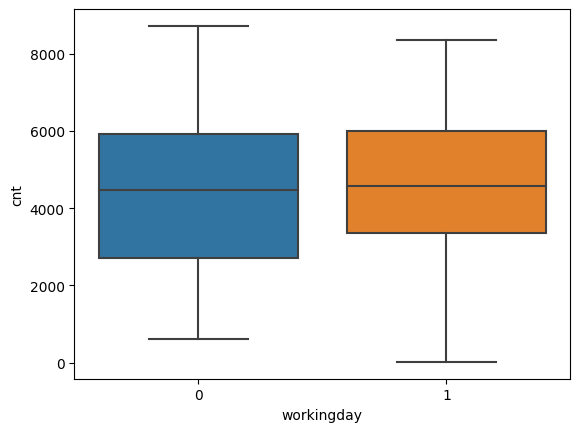

In [17]:
sns.boxplot(x=data["workingday"], y=data["cnt"]) 
#On non working days, the demand is split across a higher margin. 
#In working days, demand is high as average demand is 
#higher than the average demand on non working days

<Axes: xlabel='weathersit', ylabel='cnt'>

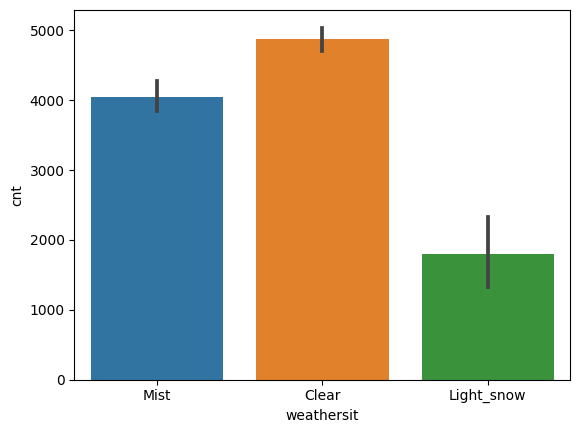

In [18]:
sns.barplot(x=data["weathersit"], y=data["cnt"]) 
#Demand is high when weather is clear

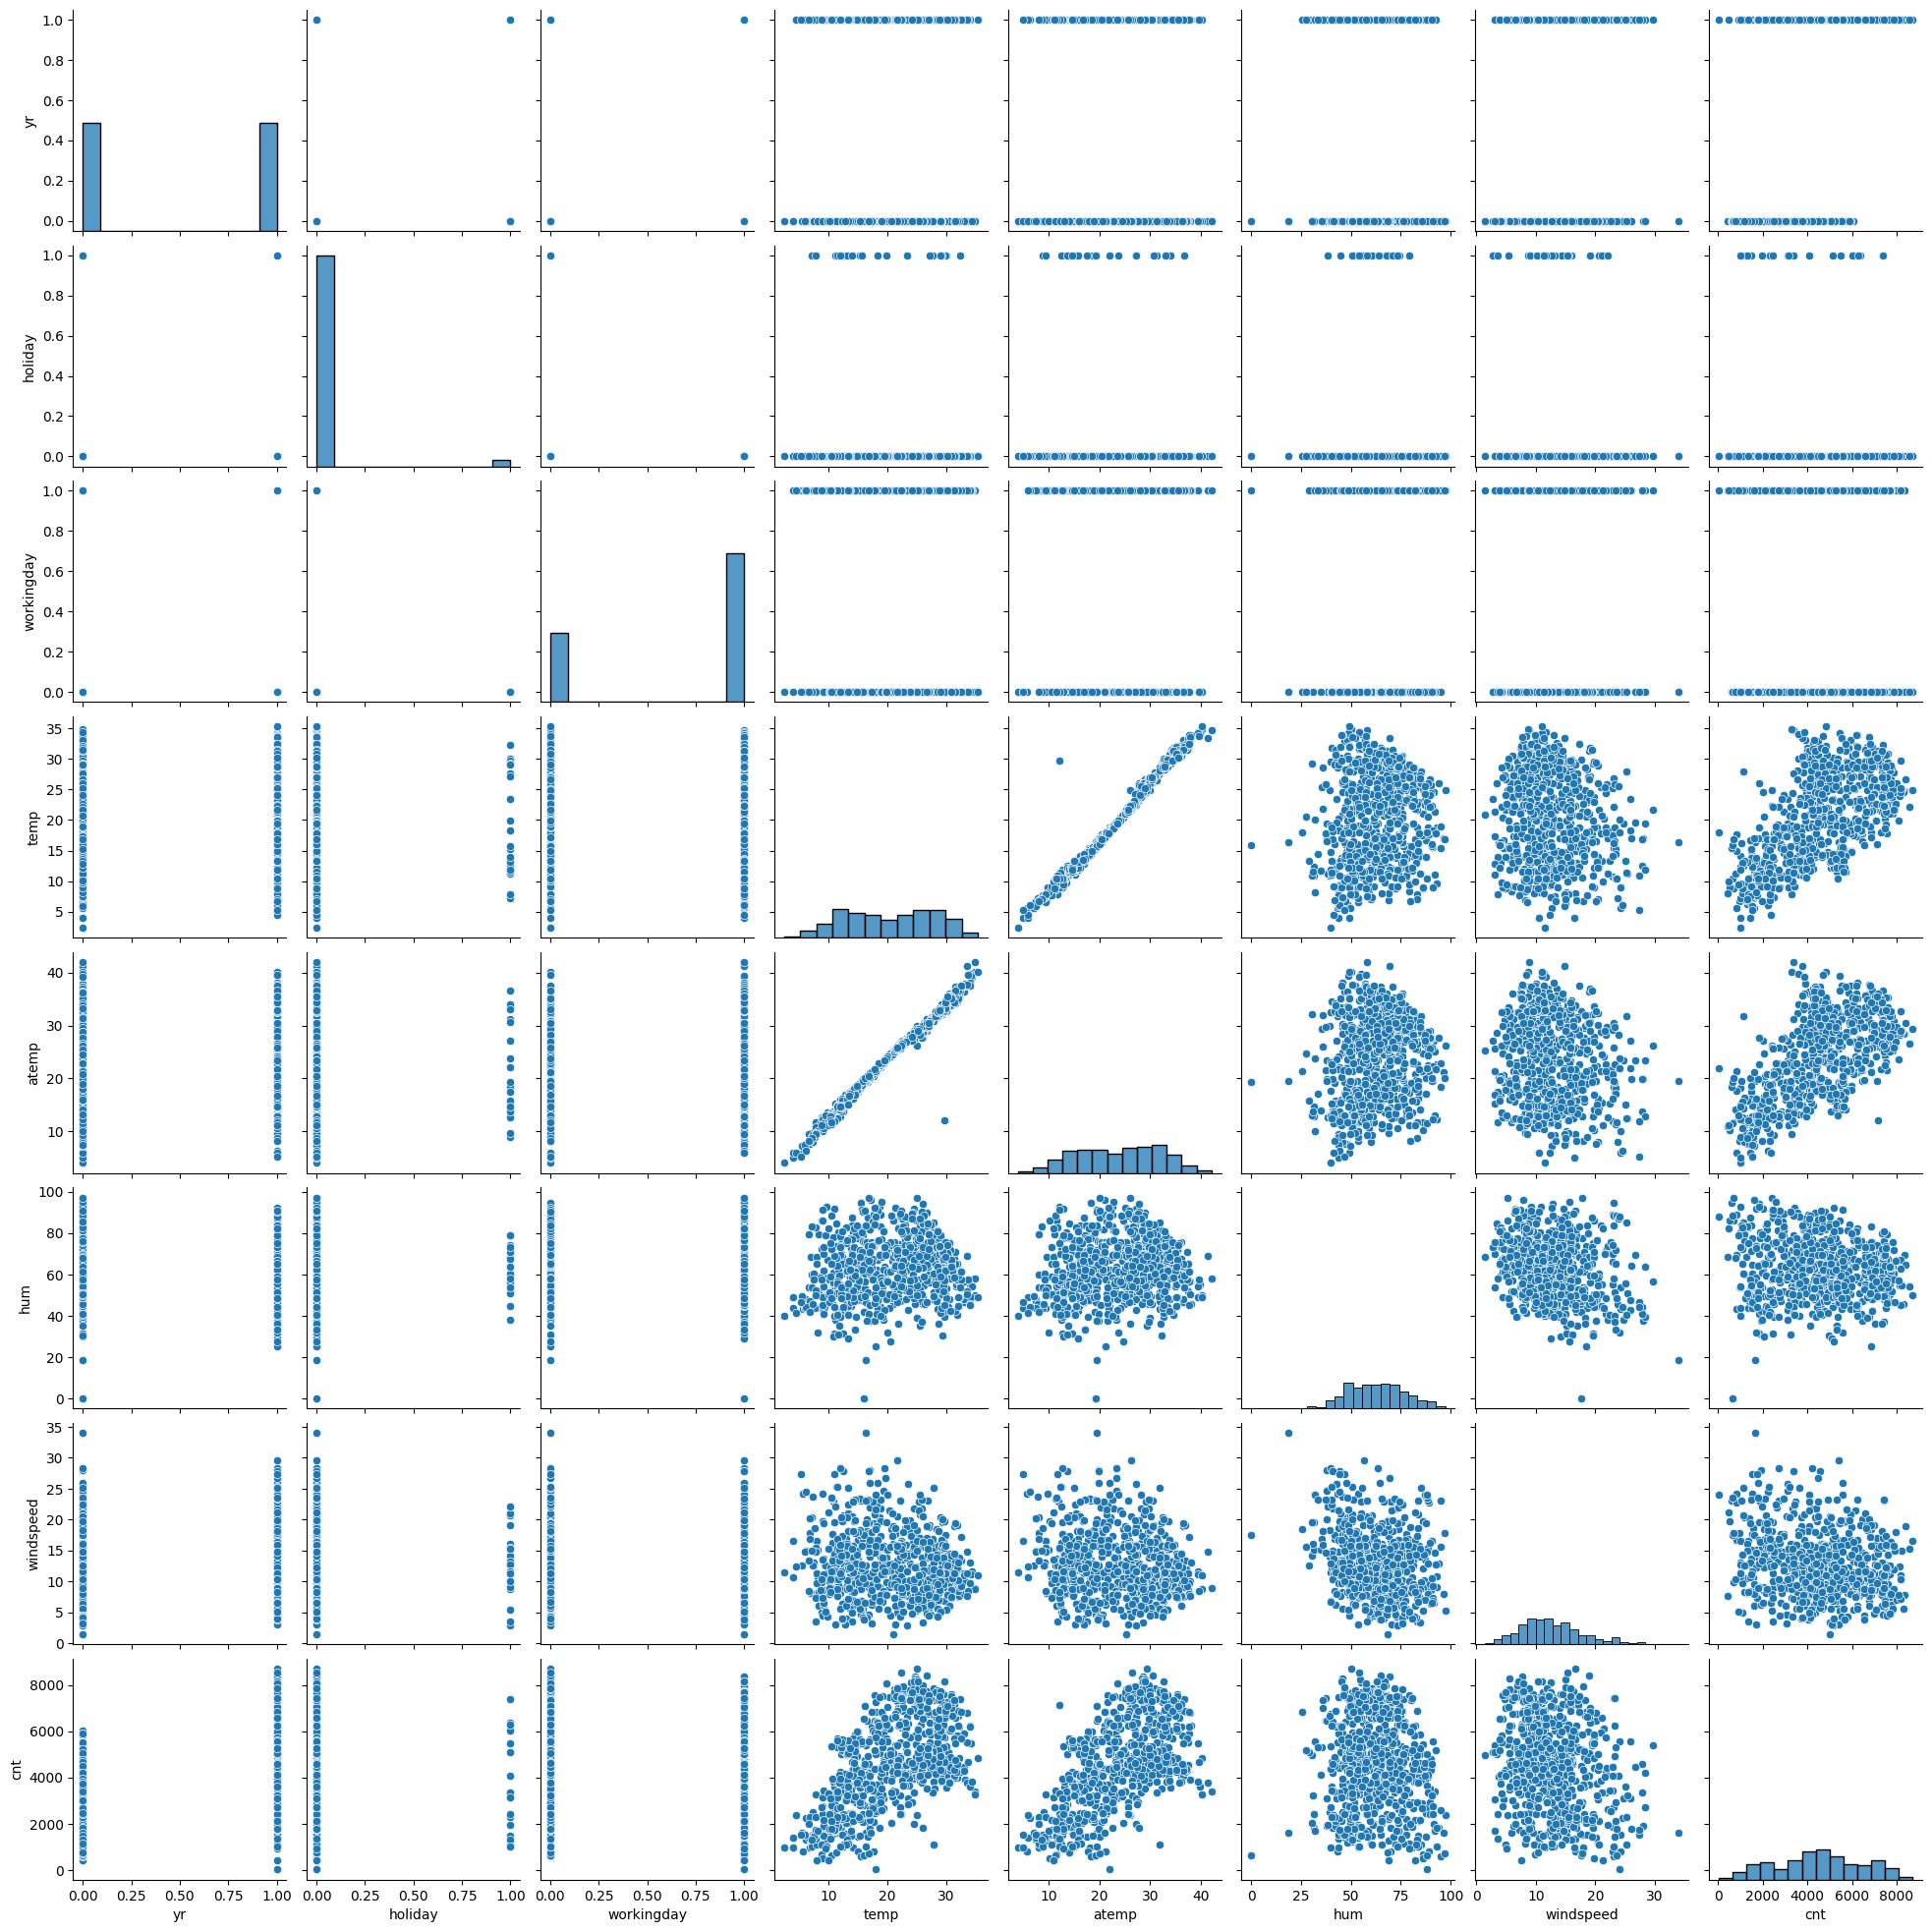

In [19]:
sns.pairplot(data)
#temp and atemp are highly correlated. 
#temp has positive correlation with cnt

<Axes: >

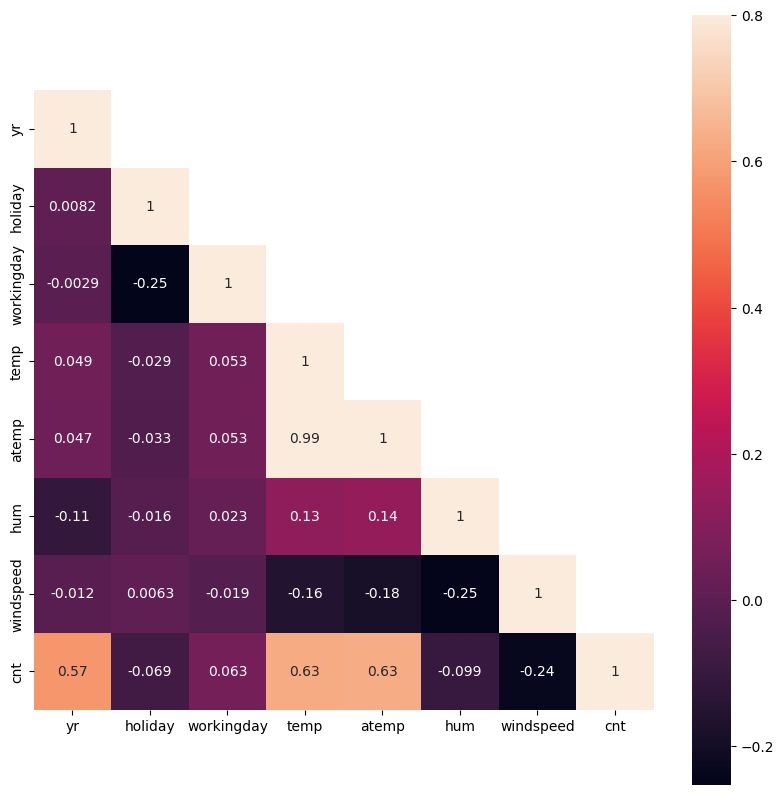

In [20]:
cor = data.corr(numeric_only='false')
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)

#Temp, Yr has high positive correlation with demand
#windspeed has negative correlation with demand

# One Hot Encoding of Categorical variables

In [21]:
season = pd.get_dummies(data["season"],drop_first=True)
season

,spring,summer,winter
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
725,True,False,False
726,True,False,False
727,True,False,False
728,True,False,False


In [22]:
month = pd.get_dummies(data["mnth"],drop_first=True)
month

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
725,False,True,False,False,False,False,False,False,False,False,False
726,False,True,False,False,False,False,False,False,False,False,False
727,False,True,False,False,False,False,False,False,False,False,False
728,False,True,False,False,False,False,False,False,False,False,False


In [23]:
weekday = pd.get_dummies(data["weekday"],drop_first=True)
weekday

,Mon,Sat,Sun,Thu,Tue,Wed
0,True,False,False,False,False,False
1,False,False,False,False,True,False
2,False,False,False,False,False,True
3,False,False,False,True,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
725,False,True,False,False,False,False
726,False,False,True,False,False,False
727,True,False,False,False,False,False
728,False,False,False,False,True,False


In [24]:
weathersit = pd.get_dummies(data["weathersit"],drop_first=True)
weathersit

,Light_snow,Mist
0,False,True
1,False,True
2,False,False
3,False,False
4,False,False
...,...,...
725,False,True
726,False,True
727,False,True
728,False,False


In [25]:
data.drop(["season","mnth","weekday","weathersit"], axis = 1, inplace=True)
data.drop(["atemp"], axis = 1, inplace=True) #temp and atemp has high correlation, hence dropping one of them

In [26]:
data = pd.concat([data,season,month,weekday,weathersit],axis=1)

<Axes: >

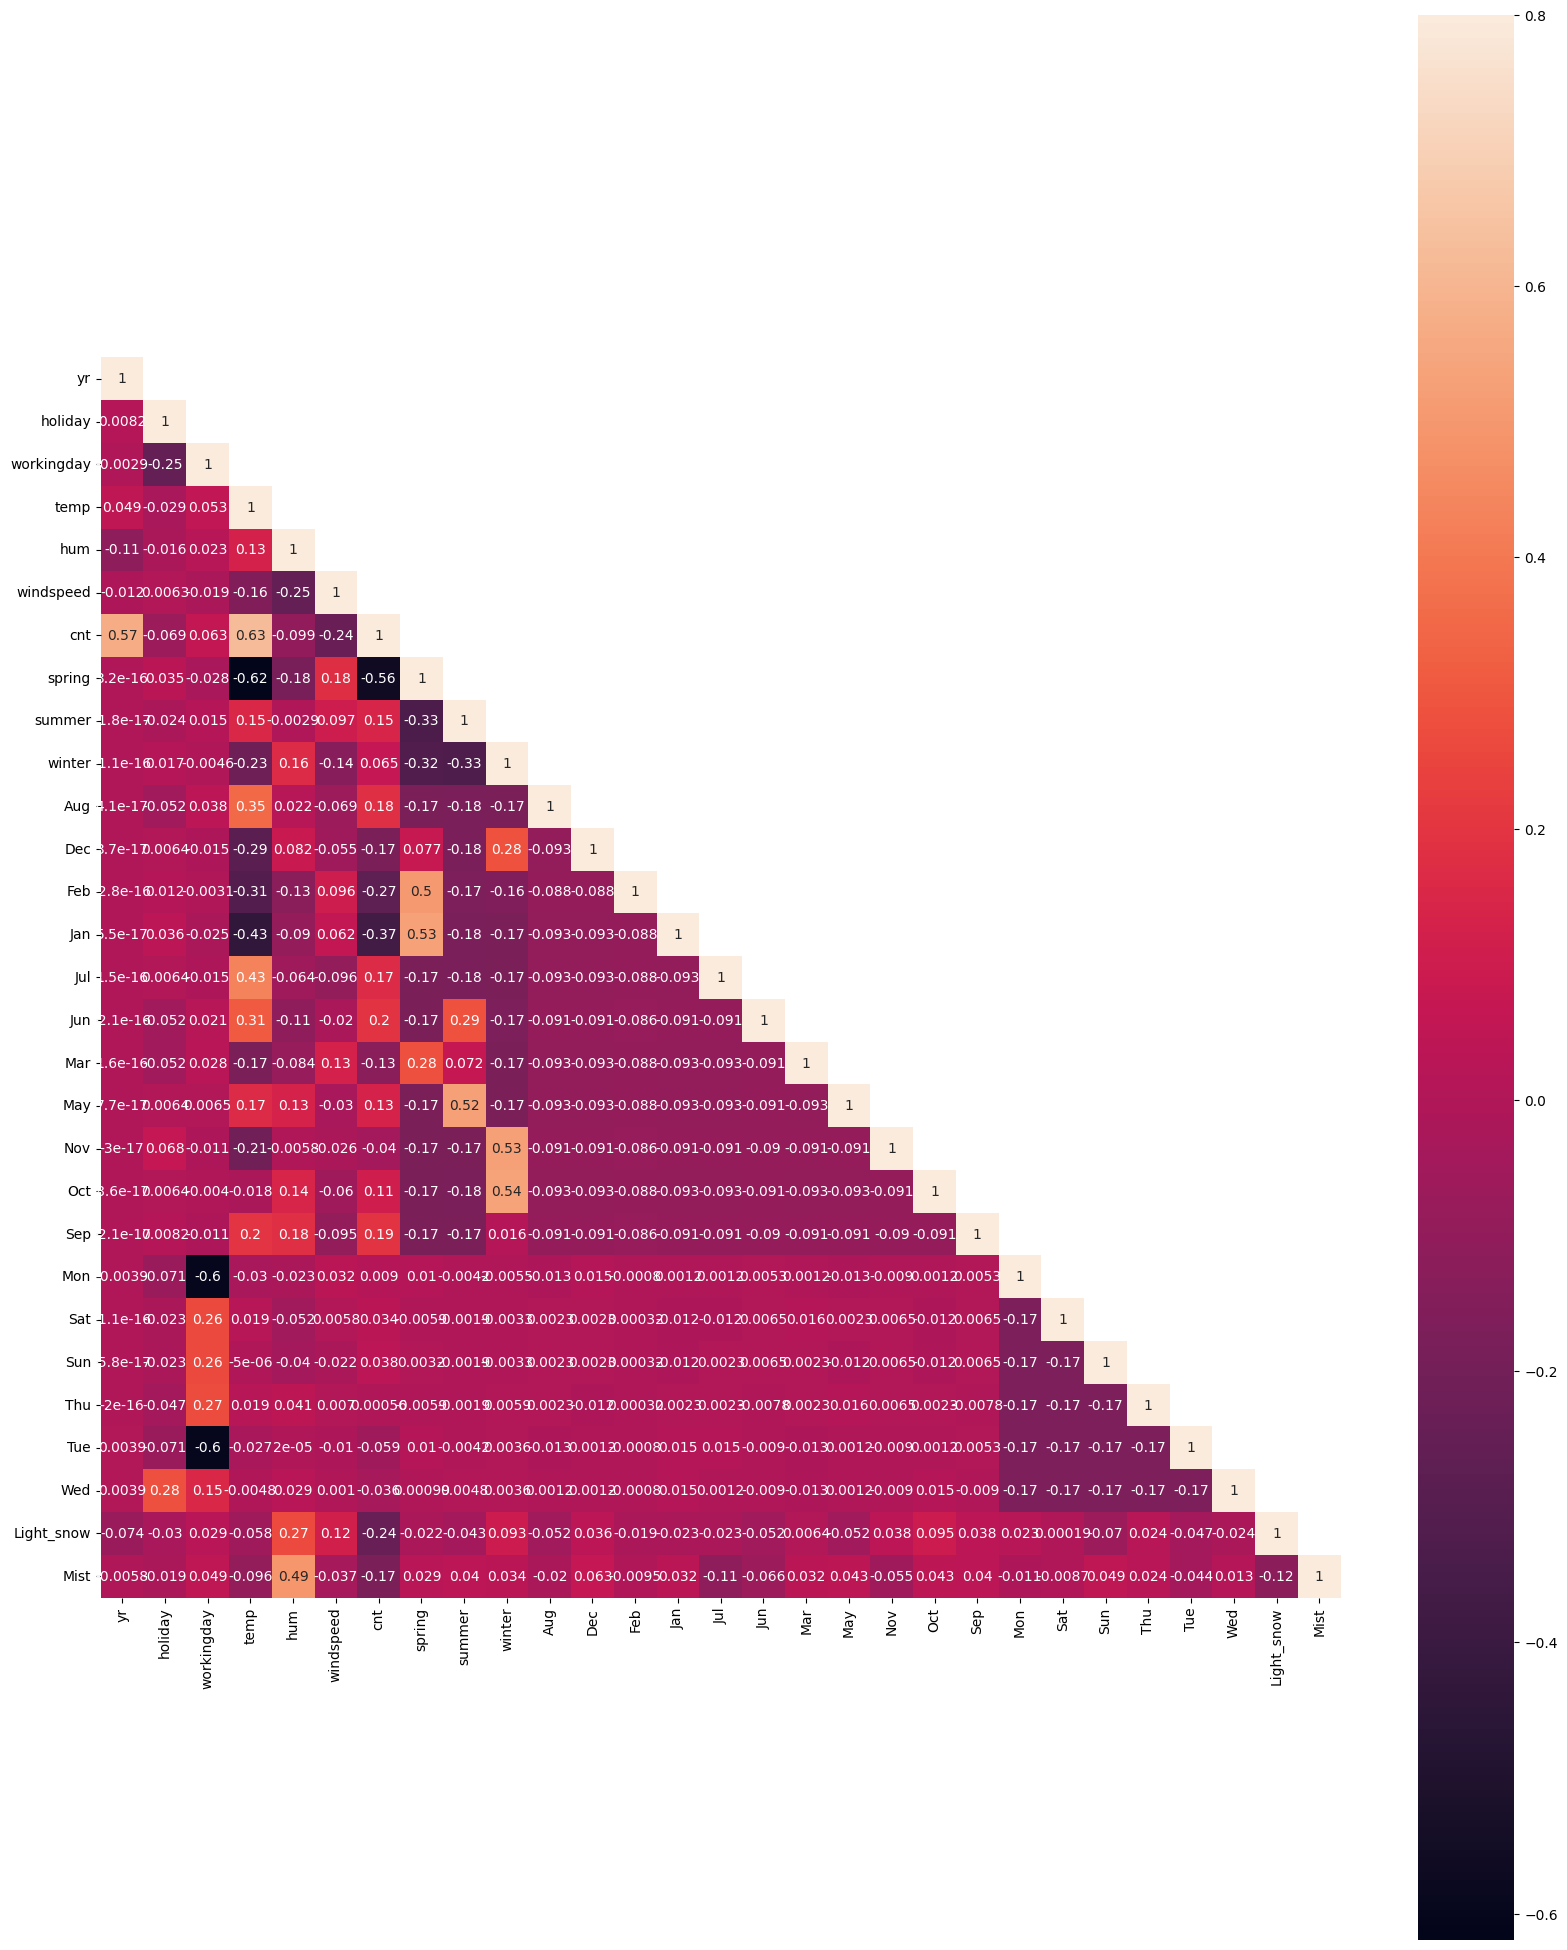

In [27]:
cor = data.corr(numeric_only='false')
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,25)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)

# Model Building

In [28]:
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snow,Mist
0,0,0,0,14.110847,80.5833,10.749882,985,True,False,False,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,14.902598,69.6087,16.652113,801,True,False,False,...,False,False,False,False,False,False,True,False,False,True
2,0,0,1,8.050924,43.7273,16.636703,1349,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0,1,8.200000,59.0435,10.739832,1562,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0,0,1,9.305237,43.6957,12.522300,1600,True,False,False,...,False,False,False,False,False,False,False,False,False,False


# Splitting to train and test

In [29]:
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

# Scaling

In [30]:
scaler = MinMaxScaler()
num_vars = ["temp","hum","windspeed","cnt"]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snow,Mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,False,False,True,...,True,False,False,False,False,True,False,False,False,False
576,1,0,1,0.815169,0.725633,0.264686,0.827658,False,False,False,...,False,False,False,False,False,True,False,False,False,False
426,1,0,0,0.442393,0.640189,0.255342,0.465255,True,False,False,...,False,False,True,False,False,False,False,False,False,True
728,1,0,0,0.245101,0.498067,0.663106,0.204096,True,False,False,...,False,False,False,False,False,False,True,False,False,False
482,1,0,0,0.395666,0.504508,0.188475,0.482973,False,True,False,...,False,False,True,False,False,False,False,False,False,True


# Splitting Dependent and Independent Variables

In [31]:
y_train = df_train['cnt']
X_train = df_train.drop(['cnt'],axis=1)


# RFE Feature Selection

In [32]:
#Fitting atrain and test data to linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.coef_)
print(lm.intercept_)

[ 2.32115721e-01  1.43397575e+12  1.43397575e+12  4.49798474e-01
 -1.53035668e-01 -1.88121236e-01 -4.54116100e-02  4.07763550e-02
  1.07127418e-01  1.63079336e-02 -4.63200803e-02 -3.29225428e-02
 -6.44549279e-02 -3.88923765e-02 -3.57394779e-03 -1.09334494e-03
  2.39221425e-02 -4.13818359e-02  7.75146484e-03  8.12416077e-02
  1.43397575e+12 -3.35693359e-03  5.03540039e-03 -1.49106979e-02
  1.43397575e+12 -1.59301758e-02 -2.56591797e-01 -6.07604980e-02]
-1433975754413.6978


In [33]:
rfe = RFE(lm, n_features_to_select = 15)             
rfe = rfe.fit(X_train, y_train)
#RFE is used to select & eliminate feature based on reursive method
#15 relevant features are extracted

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
#Viewing ranks and supported features in RFE

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 8),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 13),
 ('Sun', False, 10),
 ('Thu', False, 9),
 ('Tue', True, 1),
 ('Wed', False, 7),
 ('Light_snow', True, 1),
 ('Mist', True, 1)]

In [35]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [40]:
#RFE selected features 

X_rfe = X_train.columns[rfe.support_]
X_sm= X_train[X_rfe].astype(float)
X_rfe
#list(X_sm)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jul', 'Sep', 'Mon', 'Tue', 'Light_snow', 'Mist'],
      dtype='object')

In [41]:
#VIF is calculated for RFE selected features
calculateVIF(X_sm)
list(X_sm)

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'spring',
 'summer',
 'winter',
 'Jul',
 'Sep',
 'Mon',
 'Tue',
 'Light_snow',
 'Mist']

In [42]:
#Building linear model1
X_train_sm1 = sm.add_constant(X_sm)

#Viewing the statisctis of the features using statsmodel
#print(y_train)
#y_train = pd.get_dummies(y_train, drop_first=True)
#X_train_sm1 = pd.get_dummies(X_train_sm1, drop_first=True)

lm_sm1 = sm.OLS(y_train.astype(float), X_train_sm1.astype(float)).fit()   
print(lm_sm1.summary())

list(X_sm)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 31 Jul 2023   Prob (F-statistic):          1.13e-191
Time:                        21:48:07   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1989      0.028      7.181      0.0

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'spring',
 'summer',
 'winter',
 'Jul',
 'Sep',
 'Mon',
 'Tue',
 'Light_snow',
 'Mist']

In [44]:
X_sm1= X_sm.drop(['hum'],axis=1)

In [45]:
#VIF is calculated for RFE seleceted features
calculateVIF(X_sm1)

,Features,VIF
2,workingday,35.88
10,Mon,8.96
11,Tue,8.41
5,spring,4.96
3,temp,3.38
7,winter,3.36
6,summer,2.59
1,holiday,2.34
8,Jul,1.48
9,Sep,1.29


In [46]:
#Building linear model2
X_train_sm2 = sm.add_constant(X_sm1)

#Viewing the statisctis of the features using statsmodel
lm_sm2 = sm.OLS(y_train.astype(float), X_train_sm2.astype(float)).fit()   
print(lm_sm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 31 Jul 2023   Prob (F-statistic):          5.73e-189
Time:                        21:48:51   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1356      0.024      5.698      0.0

In [47]:
#temp has high VIF, hence dropping them
X_sm2= X_sm1.drop(["windspeed"],axis=1)

In [48]:
#VIF is calculated for RFE seleceted features
calculateVIF(X_sm2)

,Features,VIF
2,workingday,33.10
9,Mon,8.24
10,Tue,7.80
4,spring,4.93
3,temp,3.37
6,winter,3.36
5,summer,2.56
1,holiday,2.22
7,Jul,1.48
8,Sep,1.28


In [49]:
#Building linear model3
X_train_sm3 = sm.add_constant(X_sm2)

#Viewing the statisctis of the features using statsmodel
lm_sm3 = sm.OLS(y_train.astype(float), X_train_sm3.astype(float)).fit()   
print(lm_sm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.4
Date:                Mon, 31 Jul 2023   Prob (F-statistic):          1.53e-182
Time:                        21:49:20   Log-Likelihood:                 490.60
No. Observations:                 510   AIC:                            -955.2
Df Residuals:                     497   BIC:                            -900.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0949      0.024      4.019      0.0

In [50]:
X_sm3= X_sm2.drop(["workingday"],axis=1)
#Dropping working day as it has high VIF, retaining temp as temp has dependency on bike demand

In [51]:
calculateVIF(X_sm3)
#VIF values are < 5, still considering p-values

,Features,VIF
2,temp,4.34
0,yr,2.07
4,summer,1.95
5,winter,1.64
6,Jul,1.59
11,Mist,1.55
3,spring,1.48
7,Sep,1.34
8,Mon,1.22
9,Tue,1.22


In [52]:
#Building linear model4
X_train_sm4 = sm.add_constant(X_sm3)

#Viewing the statisctis of the features using statsmodel
lm_sm4 = sm.OLS(y_train, X_train_sm4).fit()   
print(lm_sm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.4
Date:                Mon, 31 Jul 2023   Prob (F-statistic):          1.53e-182
Time:                        21:50:22   Log-Likelihood:                 490.60
No. Observations:                 510   AIC:                            -955.2
Df Residuals:                     497   BIC:                            -900.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1549      0.029      5.340      0.0

In [55]:
#Jan has  p value > 0.05, hence dropping
X_sm4= X_sm3.drop(["Jul"],axis=1)

In [56]:
calculateVIF(X_sm4)

,Features,VIF
2,temp,3.06
0,yr,2.06
4,summer,1.64
10,Mist,1.55
5,winter,1.49
3,spring,1.40
6,Sep,1.23
7,Mon,1.22
8,Tue,1.21
9,Light_snow,1.07


In [57]:
#Building linear model5
X_train_sm5 = sm.add_constant(X_sm4)

#Viewing the statisctis of the features using statsmodel
lm_sm5 = sm.OLS(y_train, X_train_sm5).fit()   
print(lm_sm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.6
Date:                Mon, 31 Jul 2023   Prob (F-statistic):          3.18e-182
Time:                        21:53:39   Log-Likelihood:                 487.05
No. Observations:                 510   AIC:                            -950.1
Df Residuals:                     498   BIC:                            -899.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1469      0.029      5.061      0.0

In [58]:
X_sm5= X_sm4.drop(["Mon"],axis=1)
#Mon has p-value > 0.05, hence dropping

In [59]:
calculateVIF(X_sm5)

,Features,VIF
2,temp,2.97
0,yr,2.06
4,summer,1.63
9,Mist,1.55
5,winter,1.46
3,spring,1.35
6,Sep,1.23
7,Tue,1.18
8,Light_snow,1.07
1,holiday,1.05


In [60]:
#Building linear model6
X_train_sm6 = sm.add_constant(X_sm5)

#Viewing the statisctis of the features using statsmodel
lm_sm6 = sm.OLS(y_train, X_train_sm6).fit()   
print(lm_sm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.6
Date:                Mon, 31 Jul 2023   Prob (F-statistic):          2.50e-183
Time:                        21:54:53   Log-Likelihood:                 486.82
No. Observations:                 510   AIC:                            -951.6
Df Residuals:                     499   BIC:                            -905.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1488      0.029      5.154      0.0

In [61]:
X_sm6= X_sm5.drop(["spring"],axis=1)

In [62]:
calculateVIF(X_sm6)

,Features,VIF
2,temp,2.95
0,yr,1.94
3,summer,1.51
8,Mist,1.43
4,winter,1.36
5,Sep,1.20
6,Tue,1.15
7,Light_snow,1.06
1,holiday,1.03


In [63]:
#Building linear model7
X_train_sm7 = sm.add_constant(X_sm6)

#Viewing the statisctis of the features using statsmodel
lm_sm7 = sm.OLS(y_train, X_train_sm7).fit()   
print(lm_sm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     261.0
Date:                Mon, 31 Jul 2023   Prob (F-statistic):          1.29e-182
Time:                        21:55:57   Log-Likelihood:                 482.26
No. Observations:                 510   AIC:                            -944.5
Df Residuals:                     500   BIC:                            -902.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.014      5.324      0.0

In [64]:
lm_sm7.params

#lm_sm7 is the final model with R2 and adjusted R2 of 0.825 & 0.821.
#Good F statistic of 261
#p-value is 1.29e-182, which is < 0.05

const         0.072119
yr            0.231429
holiday      -0.110529
temp          0.571837
summer        0.081044
winter        0.139663
Sep           0.105626
Tue          -0.050095
Light_snow   -0.304222
Mist         -0.080007
dtype: float64

# Prediction and Residual Analysis

In [65]:
y_train_pred = lm_sm7.predict(X_train_sm7)

Text(0.5, 0, 'Errors')

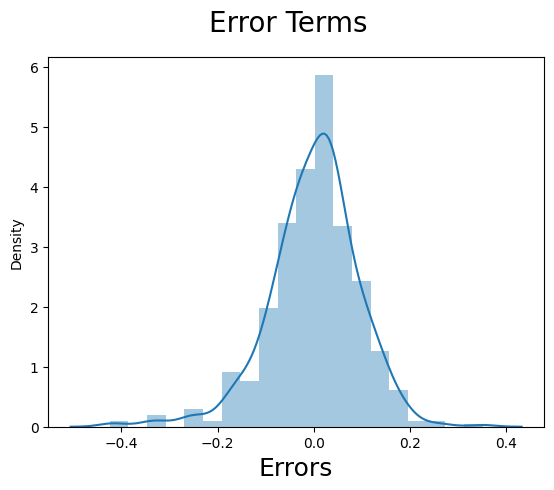

In [66]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)    
#error terms are normally distirbuted, with mean 0

In [67]:
vif = [variance_inflation_factor(X_train_sm7.values, i) for i in range(X_train_sm7.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train_sm7.columns).T

,const,yr,holiday,temp,summer,winter,Sep,Tue,Light_snow,Mist
vif,10.384993,1.015652,1.019843,1.14747,1.178266,1.188223,1.103784,1.012552,1.041791,1.042257


Text(0, 0.5, 'y_train_pred')

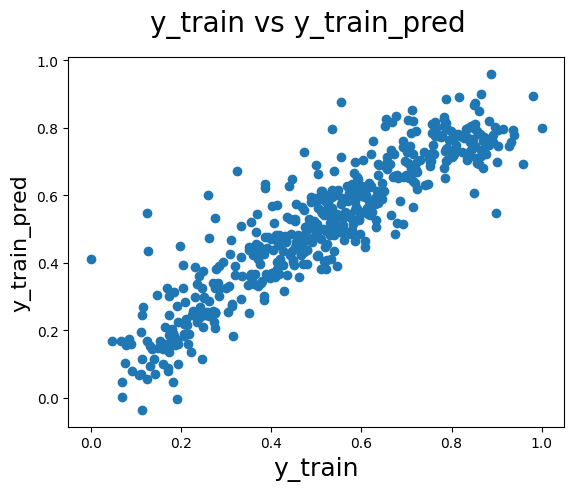

In [68]:
# Plotting y_train and y_train_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)                          # Y-label

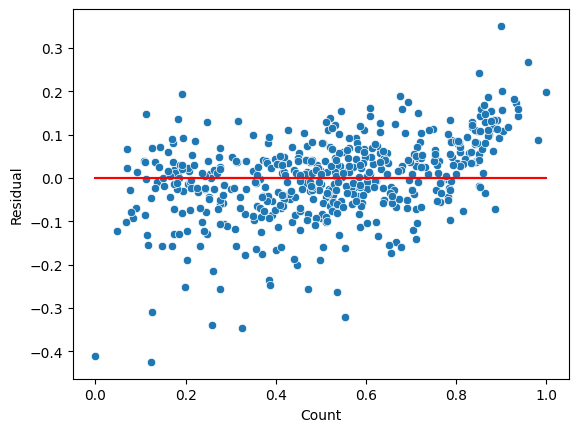

In [70]:
residual = y_train - y_train_pred
sns.scatterplot(x=y_train, y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#No pattern observed 

# Making Prediction

In [71]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
#tranforming test data based on fit train data

In [72]:
#Dividing into X_test and y_test
y_test = df_test['cnt']
X_test = df_test.drop(['cnt'],axis = 1)

In [73]:
# Creating dataframe by dropping variables from X_test
X_test_sm = X_test[X_sm6.columns]

# Making predictions
X_test_sm = sm.add_constant(X_test_sm)
y_pred = lm_sm7.predict(X_test_sm)



In [74]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
print("R2: %.2f" % r2_score(y_test, y_pred))

R2: 0.80


# Model Evaluation 

Text(0, 0.5, 'y_pred')

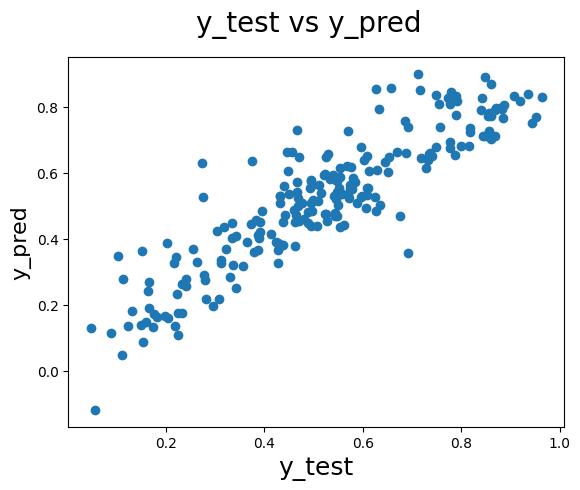

In [75]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

<Axes: ylabel='Density'>

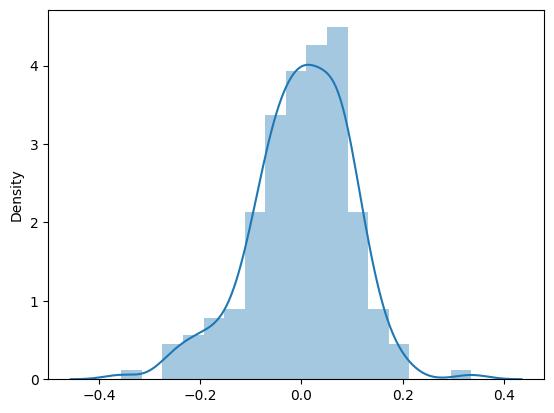

In [76]:
residual = y_test - y_pred
sns.distplot(residual)
#test residual errors are normally distributed

In [77]:
np.mean(residual)

4.313062683952858e-06

In [78]:
# Calculating R2 & Adjusted-R^2 value for the test dataset
print("R2: %.2f" % r2_score(y_test, y_pred))
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print("Adjusted R2: %.2f" % adjusted_r2)

R2: 0.80
Adjusted R2: 0.77


In [80]:
lm_sm7.params

const         0.072119
yr            0.231429
holiday      -0.110529
temp          0.571837
summer        0.081044
winter        0.139663
Sep           0.105626
Tue          -0.050095
Light_snow   -0.304222
Mist         -0.080007
dtype: float64

Final Model :

cnt = 0.072119 + yr * 0.231429 - holiday * 0.110529 + temp * 0.571837 - summer * 0.081044 + winter * 0.139663 + Sep * 0.1056266 - Light_snow * 0.304222 - Mist * 0.080007

lm_sm7 is the final model with R2 and adjusted R2 of 0.825 & 0.821.
Good F statistic of 261
p-value is 1.29e-182, which is < 0.05